# Spring 19 EE511 Homework 1 
## Royston Marian Mascarenhas


## Imports and Functions
### Please scroll down for the content

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def trialgen (n):
    trials = np.random.uniform(low=0.0, high=1.0, size=n) #generate samples of size n from uniform distribution
    trialsF = []
    for i in trials: #threshold values to 0 or 1
        if (i>0.5):
            trialsF.append(1)
        else:
            trialsF.append(0)
    return trialsF      

In [4]:
def success_count (k):   
    trials2 = np.random.uniform(low=0.0, high=1.0, size=k) #generate samples of size n from uniform distribution
    trialsF2 = []
    for i in trials2: #threshold values to 0 or 1
        if (i>0.5):
            trialsF2.append(1)
        else:
            trialsF2.append(0)
    count = 0
    for i in trialsF2:
        if(i==1):
            count = count + 1 #count the number of successes
    return count

In [32]:
def success_run (lst):
    runs = []
    count = 1
    lst2 = [0] + lst + [0]
    #print(lst2)
    for i in range(1,(len(lst)+1)): #find every run of successes
        if(lst2[i]==1 and lst2[i+1]==1):
            count = count + 1
        elif (lst2[i-1] == 1 and lst2[i]==1 and lst2[i+1]!=1):
            runs.append(count) #record every run
            count = 1
    #print(runs)
    if(lst == []): 
        return 0
    longest_run = max(runs) #find longest run
    #print(runs) 
    #print(len(runs))
    #runs_len = len(set(runs))
    #plt.hist(runs,bins=longest_run,range=(0,longest_run))
    return longest_run

# [A Few Coins]

### Problem A: Write a routine to simulate a fair Bernoulli trial in your language of choice. Generate a histogram for 100 simulated Bernoulli trials.

In [153]:
sampl = trialgen(100)

#### Summary of Approach:

Text(0,0.5,'Frequency')

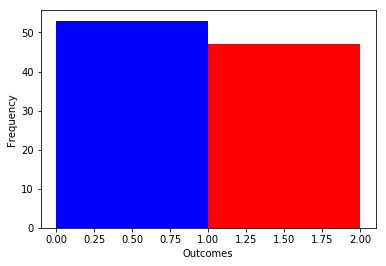

In [154]:
N,bins,patches=plt.hist(sampl,bins=2,range=(0,2)) # plot histogram
patches[0].set_facecolor('b')
patches[1].set_facecolor('r')
plt.xlabel('Outcomes')
plt.ylabel('Frequency')

> What we see above is a Bernouilli distribution.

*Algorithm followed:*
1. Generate 100 random samples from a uniform distribution with range (0,1)
2. Apply a threshold at 0.5 and round off the values above 0.5 to 1 and below 0.5 to 0 for each of the hundred samples
3. Count the number of successes and failures. Visualize it in the form of a histogram.

User defined function used: $trialgen(n)$ <br>
Parameters: n -> no. of samples used <br>
Returns: the list of samples from the bernouilli distribution <br>

But something we can question is whether the number of successes and failures in each epoch is biased. Let's take 10 such epochs and count the number of heads and tails in each epoch. 

In [23]:
sampl = trialgen(100)
c1 = []
c0 = []
for i in range(0,9):
    count1 = 0
    count0 = 0
    spl = trialgen(100)
    for i in spl:
        if(i==1):
            count1+=1
        else:
            count0+=1
    c1.append(count1) 
    c0.append(count0)

In [24]:
#Sucesses in each epoch, mean of successes and standard deviation based on 10 observations of 100 samples each
print("Successes in each epoch:"+str(c1))
print("Failures in each epoch:"+str(c0))
print("Mean of number of successes (1s) observed: "+str(np.mean(c1))+" and standard deviation of number of successes: "+str(np.std(c1)))
print("Mean of number of failures (0s) observed: "+str(np.mean(c0))+" and standard deviation of number of failures: "+str(np.std(c0)))

Successes in each epoch:[59, 44, 53, 53, 50, 47, 56, 49, 47]
Failures in each epoch:[41, 56, 47, 47, 50, 53, 44, 51, 53]
Mean of number of successes (1s) observed: 50.888888888888886 and standard deviation of number of successes: 4.507880616689065
Mean of number of failures (0s) observed: 49.111111111111114 and standard deviation of number of failures: 4.507880616689065


#### Discussion of Results:

- What we see above is a Bernouilli distribution. It has two outcomes. <br>

- From the statistic, we can observe that the Bernouilli trial is fair as the mean and the standard deviation of both outcomes are in par. <br>

- Each time, the number of successes and failures differ but when the average of each of these iterations is taken,
    we get a symmetric distribution of frequency of both outcomes. <br>
    

### Problem B: Write a routine to count the number of successes in 7 fair Bernoulli trials. Generate a histogram for 100 samples of this success-counting random variable.

In [202]:
n = 100
k=7
lst = []
for i in range(0,n):
    l = 0
    l = success_count(k)
    lst.append(l)

#### Summary of approach

Text(0.5,1,'For 100 iterations')

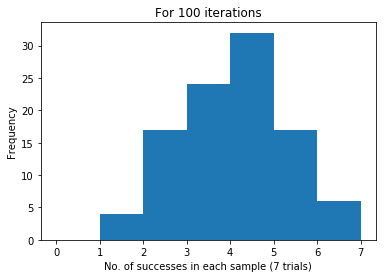

In [203]:
plt.hist(lst,bins=k,range=(0,k))
plt.ylabel('Frequency')
plt.xlabel('No. of successes in each sample (7 trials)')
plt.title('For 100 iterations')

Text(0.5,1,'For larger iterations, more samples makes the histogram more symmetric')

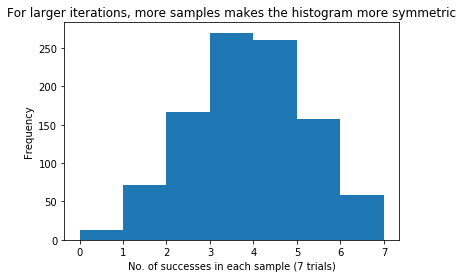

In [93]:
n = 1000
k=7
lst = []
for i in range(0,n):
    l = 0
    l = success_count(k)
    lst.append(l)
plt.hist(lst,bins=k,range=(0,k))
plt.ylabel('Frequency')
plt.xlabel('No. of successes in each sample (7 trials)')
plt.title('For larger iterations, more samples makes the histogram more symmetric')

> The distribution we see above is a binomial distribution with k  = 7

- The mean of a binomial distribution (n,p) is n*p. In this case, it is 7 x 0.5 = 3.5
- The variance is n*p*q which is 7 x 0.5 x 0.5 = 1.75
- The standard deviation is 1.333

_Algorithm_:
1. Generate k thresholded samples (o or 1) from the uniform ditribution
2. Count the number of successes and store them
3. Repeat the process for a 1000 times

User defined functions used: <br>
$trialgen(n)$ <br>
Parameters: n -> no. of samples used <br>
Returns: the list of samples from the bernouilli distribution <br>

$success_count (k)$ <br>
Parameters: k -> no. trials per iteration <br>
Returns: the count of number of succcesses <br>

#### Discussion of Results:

- Above, we observe the pdf of a binomial distribution
- The mean is 3.5. From the histogram, we observe maximum density of frequency around the mean
- Here, since p is 0.5, i.e. the outcomes are equiprobable, the histogram is symmetric
- The trials in a binomial distribution are independent of each other
- For larger iterations, more samples makes the histogram more symmetric

### Problem C: Write a routine to count the longest run of heads in 100 Bernoulli samples. Generate a histogram for this random variable.

In [65]:
lst2 = []
longest_runs = []
for i in range(0,1000):
    lst2 = trialgen(100)
    u = success_run(lst2)
    longest_runs.append(u)
    lst2=[]
    u = 0

#### Summary and Approach:

Text(0,0.5,'Frequency')

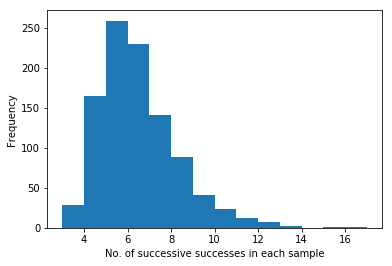

In [69]:
min1=np.min(longest_runs)
max1=np.max(longest_runs)
plt.hist(longest_runs,bins=max1-min1,range=(min1,max1))
plt.xlabel("No. of successive successes in each sample")
plt.ylabel("Frequency")

> The distribution that we see above is a skewed mulitinomial distribution

_Algorithm_:
1. Generate 100 thresholded samples (0 or 1) from the uniform ditribution
2. Count the longest runs of contiguous 1s 
3. Repeat the process for a 1000 times

User defined functions used: <br>
$trialgen(n)$ <br>
Parameters: n -> no. of samples used <br>
Returns: the list of samples from the bernouilli distribution <br>

__success_run (lst)__<br>
Parameters: lst -> list of trials <br>
Returns: longest run of number of succcesses <br>

#### Discussion of Results:

- The distribution that we see above is a skewed mulitinomial distribution
- In the previous case, the number of outcomes were just two. Now, however, the range is more or less between 3 and 15. Thus, multinomial. Therefore, we can say that each observation has a discrete number of outcomes.
- It is skewed to the right because of the varying probabilities of each outcomes
- From the graph, we can eyeball that the chances of having 6-7 longest run is the highest since it is biased in that direction
-  This is what differentiates it from problem b where the histogram was symmetric because of equal probabilities

### Comparison Summary:

1. In the first sub problem, the histogram was the bernouilli RV. The second was the binomial RV followed by the multinomial RV.
2. The first two histograms had the property of symmetry whereas the last histogram lacked it due to varying outcome probablities.
3. The probability of each outcome was constant in each case.

# [Counting Successes]

### Take your Bernoulli success-counting random variable (the binomial random variable). Generate and sum k=5 samples from this routine. Generate 300 such sums and histogram your results. Repeat for k={10, 30, 50}. Comment on the histograms you observe for the different values of k.

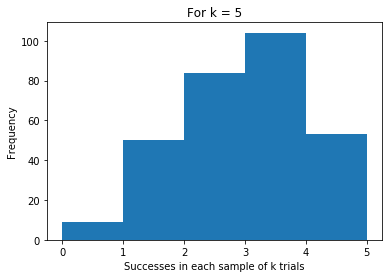

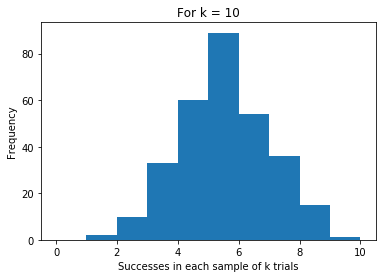

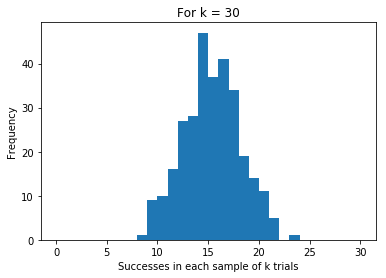

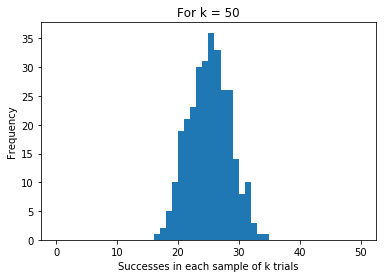

In [113]:
n = 300
k= [5,10,30,50]
lstk5 = []
for j in k:
    for i in range(0,n):
        l5 = 0
        l5 = success_count(j)
        lstk5.append(l5)
    plt.figure(j/5)
    if(j==5):
        plt.title('For k = 5')
    elif(j==10):
        plt.title('For k = 10')
    elif(j==30):
        plt.title('For k = 30')
    elif(j==50):
        plt.title('For k = 50')
    plt.ylabel('Frequency')
    plt.xlabel('Successes in each sample of k trials')
    plt.hist(lstk5,bins=j,range=(0,j))
    lstk5 = []

#### Summary of Approach: (includes plots above)

> The distributions above are binomial distributions.

- The mean of a binomial distribution (n,p) is n*p. In this case, it is 
  1. 5 x 0.5 = 2.5 when k = 5
  2. 10 x 0.5 = 5 when k = 10
  3. 30 x 0.5 = 15 when k = 30
  4. 50 x 0.5 = 25 when k = 50
*********************************************************************
- The variance is n*p*q which is 
  1. 5 x 0.5 x 0.5 = 1.25 when k = 5
  2. 10 x 0.5 x 0.5 = 2.5 when k = 10
  3. 30 x 0.5 x 0.5 = 7.5 when k = 30
  4. 50 x 0.5 x 0.5 = 12.5 when k = 50

_Algorithm_:
1. Generate k thresholded samples (0 or 1) from the uniform ditribution
2. Count the number of successes and store them
3. Repeat the process for 300 times
4. Repeat for different values of k

User defined functions used: <br>
$trialgen(n)$ <br>
Parameters: n -> no. of samples used <br>
Returns: the list of samples from the bernouilli distribution <br>

$success_count (k)$ <br>
Parameters: k -> no. trials per iteration <br>
Returns: the count of number of succcesses <br>

#### Discussion of Results:

- We see above that with changes in k (number of trials), the distribution changes in shape but the symmetry is almost maintained throughout the changes
- In each case, the maximum density of points is observed around the mean
- The probability of each outcome remains constant from trial to trial

Effect of number of trials n and probability of success p on shape:

- For small p and small n, the binomial distribution is what we call skewed right. That is, the bulk of the probability falls in the smaller numbers.
- For large p and small n, the binomial distribution is what we call skewed left. That is, the bulk of the probability falls in the larger numbers
- For p = 0.5 and any n, the binomial distribution is what we call symmetric
- For small p and large n, the binomial distribution approaches symmetry



# [Continuous Distributions]

### Use the inverse CDF method to generate 1000 samples of the X~exp(5) and Y~Cauchy(0,2). Generate histograms of the samples. Suggests other methods for testing goodness-of-fit.

In [98]:
theta = 5
expt = np.random.uniform(low=0.0, high=1.0, size=1000)
ICDF1 = []
temp = 0
for i in expt:    
    temp = - theta* np.log(1 - i)
    ICDF1.append(temp)

In [127]:
theta2 = 15 #Exponential for theta = 15
expt2 = np.random.uniform(low=0.0, high=1.0, size=1000)
ICDF2 = []
temp2 = 0
for i in expt2:    
    temp2 = - theta2* np.log(1 - i)
    ICDF2.append(temp2)

In [128]:
theta3 = 25 #Exponential for theta = 25
expt3 = np.random.uniform(low=0.0, high=1.0, size=1000)
ICDF3 = []
temp3 = 0
for i in expt3:    
    temp3 = - theta3* np.log(1 - i)
    ICDF3.append(temp3)

In [139]:
expt = np.random.uniform(low=0.0, high=1.0, size=1000) #Cauchy
ICDF = []
temp = 0
for i in expt:    
    temp = 2 * np.tan(np.pi*(i-0.5))
    ICDF.append(temp)

#### Summary of Approach:

Text(0.5,0,'Samples')

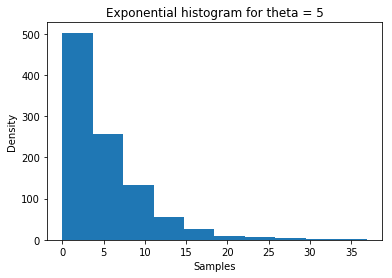

In [141]:
plt.hist(ICDF1)
plt.title('Exponential histogram for theta = 5')
plt.ylabel('Density')
plt.xlabel('Samples')

#### Histograms for different values of $\theta$ with scaled x axis

Text(0.5,0,'Samples')

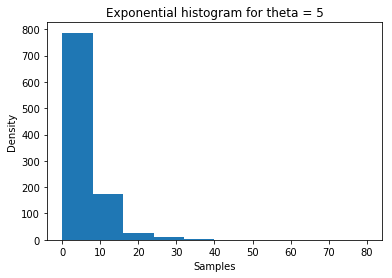

In [145]:
plt.hist(ICDF1,range=(0,80))
plt.title('Exponential histogram for theta = 5')
plt.ylabel('Density')
plt.xlabel('Samples')

Text(0.5,0,'Samples')

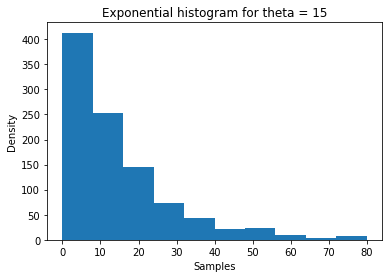

In [146]:
plt.hist(ICDF2,range=(0,80))
plt.title('Exponential histogram for theta = 15')
plt.ylabel('Density')
plt.xlabel('Samples')

Text(0.5,0,'Samples')

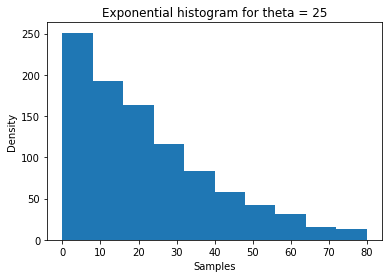

In [147]:
plt.hist(ICDF3,range=(0,80))
plt.title('Exponential histogram for theta = 25')
plt.ylabel('Density')
plt.xlabel('Samples')

Text(0.5,1,'Cauchy histogram')

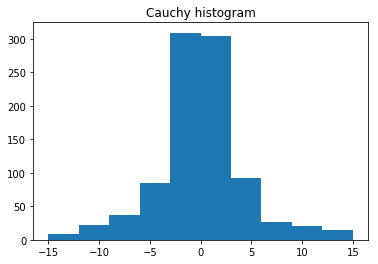

In [140]:
plt.hist(ICDF,range=(-15,15))
plt.title('Cauchy histogram')

_Mean and variances_ : <br>

Mean of exponential distribution: theta = 5 <br>
Variance of exponential distribution: theta squared = 25 <br>

Mean of Cauchy distribution: 0 <br>


_Algorithm followed:_ <br>
1. Sample from the uniform distribution <br>
2. Find the CDF by integrating the pdf and getting the ICDF by making x the subject of formula<br>
3. Substitute the value sampled from the uniform distribution in the inverse CDF of the given pdf with loaded parameters

_Formulae_: <br> <br>
The ICDF of an Exponential distribution is given by:
x = - $\theta$ * np.log(1 - u) <br>
The ICDF of a Cauchy distribution (0,2) is given by:
x= 2 * tan($\pi$ * (u-0.5))

#### Discussion of Results:

- For continuous random variables, the graph of this density function will be continuous over its range. This is because it is defined over a continuous variable and also continuous range of values.
- The probability of the assumption of values of random variable to lie between ‘c’ and ‘d’ is simply equal to the area that is bounded by the density function’s curve under the points ‘c’ and ‘d’.
- The probability of getting the value less than a particular threshold is given by a CDF
- If the CDF is strictly increasing and continuous then an inverse CDF can be defined.
<br> 

For exponential histogram:

- The ICDF method can help us obtain the relevant histogram. We can observe that the approximate outline of the histogram follows an exponential curve.
- For different values of theta, we can see that the curve changes. 
- As theta decreases, the curve becomes steeper.
- Exponential distributions have a waiting time which is proportional to the decay rate of the curve. Therefore, it is used in applications involving waiting time. 
- The property of memorylesness is attributed to exponential distributions.

For Cauchy histogram:
- For Cauchy, the histogram is centered on the first parameter which is 0 in this case.
- On either side of the mean, the decay is rapid and the slope is steep.
- In this experiment, I have limited the range of the histogram. The falloff in Cauchy is quick but once it reaches a lower threshold, the falloff is almost constant. 
- The range for Cauchy in actuality goes up to 600 with most of the samples concentrated around the mean.
- The Cauchy RV has no higher moment.
- An example of an application of Cauchy is in analyzing spinning objects.

### Other methods for testing goodness of fit.

One method for testing goodness of fit is histograms. Other methods are:

1. Chi Squared Test:
    The chi-squared test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories. The observations are classified into mutually exclusive classes, and there is some theory, which gives the probability that any observation falls into the corresponding class. The purpose of the test is to evaluate how likely the observations that are made would be, assuming the null hypothesis is true.
    - Advantages: Can test association between variables,identifies differences between observed and expected values
    - Disadvantages: Categories of 2 are not good to compare, the test fails for small observations and expectations  

<br>

2. Kolmogorov-Smirnov Test:
    In statistics, the Kolmogorov–Smirnov test (K–S test or KS test) is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample K–S test). In the special case of testing for normality of the distribution, samples are standardized and compared with a standard normal distribution. This is equivalent to setting the mean and variance of the reference distribution equal to the sample estimates. 
    - Advantages:  The distribution of statistic does not depend on CDF being tested and the test is exact.
    - Disadvantages: The test is too conservative, and distributions that are not normal are wrongly classified as such.

<br>

3. Coefficient of determination (R Squared test):
    The coefficient of determination, denoted R2 is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.
    - Advantages: Accurate in most cases
    - Disadantages: The R-squared can be used to compare two models that you already validated. 


4. Akaike information criterion
    The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection. AIC estimates the relative amount of information lost by a given model: the less information a model loses, the higher the quality of that model.
    
Other methods include: <br>
Reduced Chi Square test <br>
Kuiper's test <br>
Regression Validation <br>
Cramer Von Criterion

Source for definitions in above section: Wikipedia